In [31]:
import pandas as pd
from statsmodels.tsa.stattools import coint
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

In [47]:
SIZE = 4000

In [48]:
# Read in the data file 
df = pd.read_csv("all_prices.csv", parse_dates = ["time"])
start_date = '2022-01-01'  # extract the date from filename here
end_date = '2022-12-01'

# Get every row from the start date to the end data in 15 minute intervals
df = df[(df['time'] > start_date) & (df['time'] < end_date)]
df = df[df['time'].dt.minute % 15 == 0]
df.head()

,time,btc_price,eth_price,ltc_price,neo_price,xmr_price,xrp_price,zec_price
0,2022-01-01 08:00:00,47203.308183,3715.50000,148.10,26.249000,243.970000,0.84093,NaN
15,2022-01-01 08:15:00,47238.158052,3719.90000,148.57,26.257250,243.710000,0.84240,148.526667
30,2022-01-01 08:30:00,47275.000000,3722.30000,148.51,26.249000,243.275000,0.84149,148.270000
44,2022-01-01 08:45:00,47248.000000,3726.41216,148.24,26.247750,244.823333,0.84170,148.448750
59,2022-01-01 09:00:00,47160.000000,3724.80000,148.12,26.219625,244.387500,0.83961,147.772000


In [51]:
df = df.tail(SIZE)
df.head()

,time,btc_price,eth_price,ltc_price,neo_price,xmr_price,xrp_price,zec_price
411924,2022-10-15 12:15:00,19163.0,1286.7,51.6000,7.806050,140.770000,0.485580,50.507000
411939,2022-10-15 12:30:00,19191.0,1288.3,51.6480,7.818322,141.100000,0.485945,50.618000
411954,2022-10-15 12:45:00,19185.0,1287.6,51.5865,7.820233,141.440000,0.485880,50.596800
411969,2022-10-15 13:00:00,19177.0,1285.9,51.4810,7.810500,141.045714,0.485030,50.556273
411984,2022-10-15 13:15:00,19156.0,1285.3,51.4570,7.784475,140.854286,0.483975,50.562750


In [52]:
prices_df = df.drop("time", axis = 1)
prices_df.dropna(axis = 1, inplace = True)
prices_df.head()

,btc_price,eth_price,ltc_price,neo_price,xmr_price,xrp_price,zec_price
411924,19163.0,1286.7,51.6000,7.806050,140.770000,0.485580,50.507000
411939,19191.0,1288.3,51.6480,7.818322,141.100000,0.485945,50.618000
411954,19185.0,1287.6,51.5865,7.820233,141.440000,0.485880,50.596800
411969,19177.0,1285.9,51.4810,7.810500,141.045714,0.485030,50.556273
411984,19156.0,1285.3,51.4570,7.784475,140.854286,0.483975,50.562750


In [53]:
def engle_granger(ticker1, ticker2, threshold):
    """Returns true if we reject the null hypothesis and therefore there is cointegration"""
    test_result = coint(prices_df[ticker1], prices_df[ticker2])
    return test_result[1] <= threshold

In [54]:
cointegrated_pairs = []
for u, v in combinations(prices_df.columns, 2):
        # print(f"Testing {u} and {v}")
        if u != v:
            if (engle_granger(u, v, 0.20)):
                print(f"Found cointegrated pair: {u} and {v}")
                cointegrated_pairs.append((u, v))

Found cointegrated pair: btc_price and neo_price
Found cointegrated pair: neo_price and xmr_price
Found cointegrated pair: neo_price and xrp_price
Found cointegrated pair: xmr_price and xrp_price
Found cointegrated pair: xrp_price and zec_price


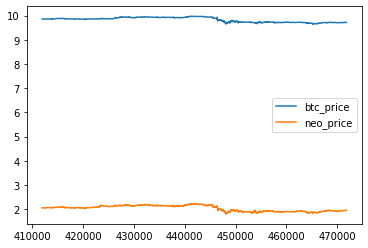

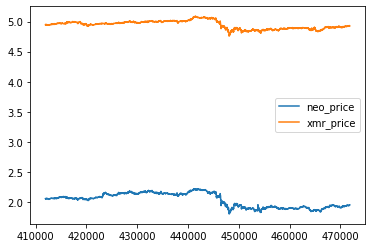

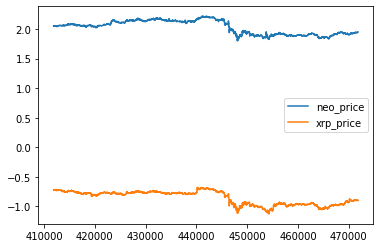

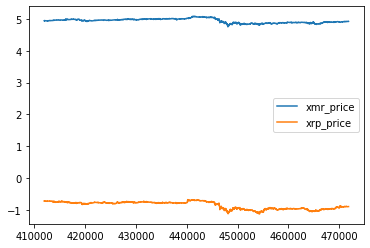

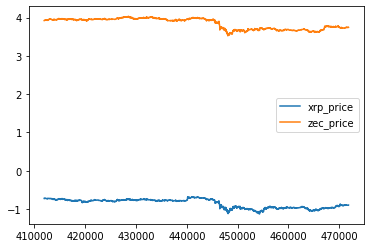

In [55]:
# Plot the cointegrated pairs
for pair in cointegrated_pairs:
    plt.figure(figsize = (6, 4))
    plt.plot(np.log(prices_df[pair[0]]), label = pair[0])
    plt.plot(np.log(prices_df[pair[1]]), label = pair[1])
    plt.legend()
    plt.show()
plt.show()